In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
df = pd.read_csv(r"C:\Users\bless\OneDrive\Desktop\week-2\nova-financial-analysis\data\stocks\AAPL_historical_data.csv")

In [12]:
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [13]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [14]:
import ta

df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()


In [15]:
macd = ta.trend.MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['Signal'] = macd.macd_signal()


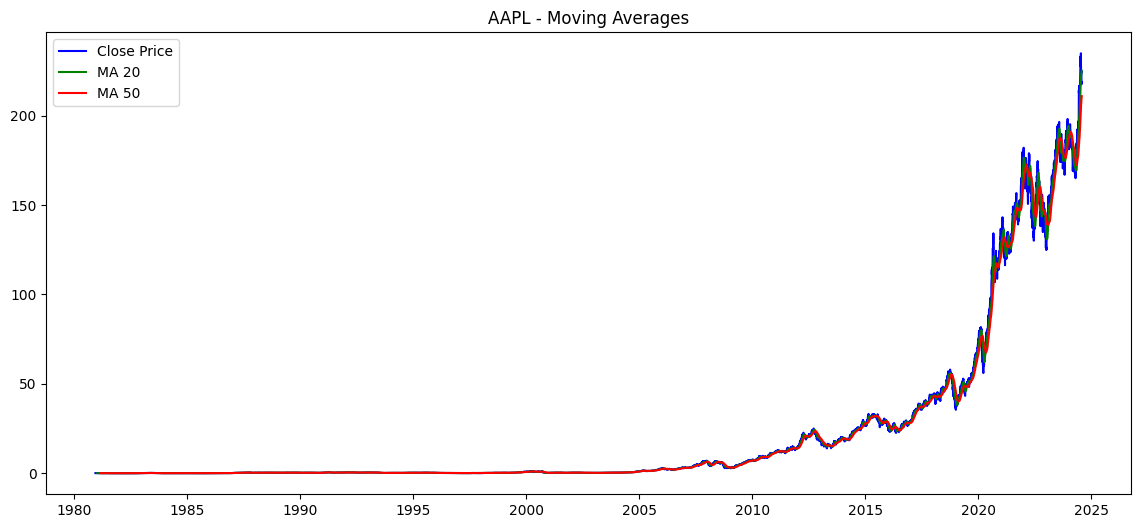

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df['MA_20'], label='MA 20', color='green')
plt.plot(df['MA_50'], label='MA 50', color='red')
plt.title('AAPL - Moving Averages')
plt.legend()
plt.show()

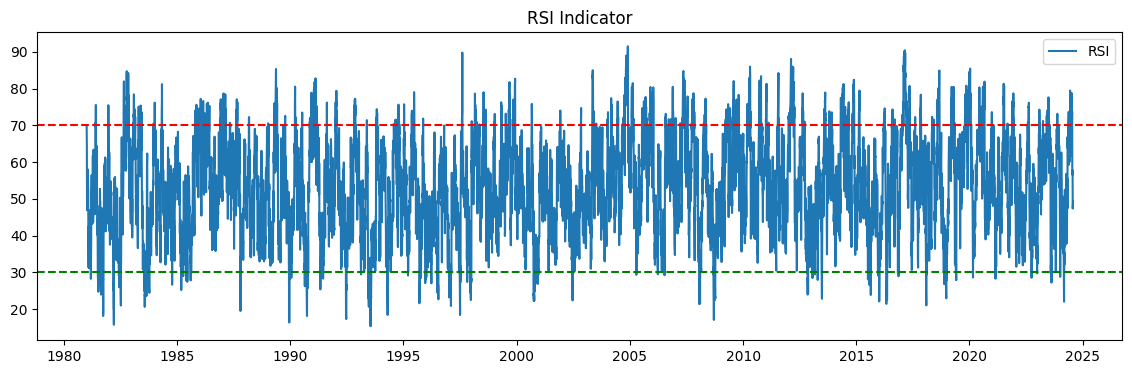

In [17]:
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI Indicator')
plt.legend()
plt.show()

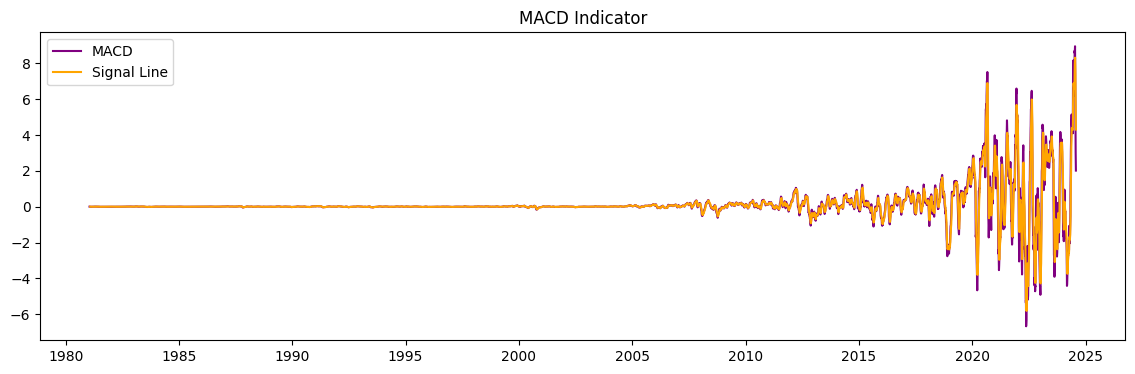

In [18]:
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='purple')
plt.plot(df['Signal'], label='Signal Line', color='orange')
plt.title('MACD Indicator')
plt.legend()
plt.show()

In [19]:
stock_files = [
    "AAPL", "AMZN", "GOOG", "META",
    "MSFT", "NVDA", "TSLA"
]


In [25]:
for stock in stock_files:
    path = f"../data/stocks/{stock}_historical_data.csv"
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.sort_index()

In [27]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['Signal'] = macd.macd_signal()

In [29]:
df[['Close', 'MA_20']].plot(figsize=(12, 4), title=f"{stock} MA and Close")
plt.savefig(f"{stock}_ma_plot.png")
plt.close()